In [1]:
#importing libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
dataset=pd.read_excel("C:/Users/Pavana Sree/Downloads/HousePricePrediction.xlsx")

In [3]:
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [4]:
dataset.shape

(2919, 13)

In [5]:
dataset.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [6]:
obj=(dataset.dtypes=='object')
object_cols=list(obj[obj].index)
print("Categorical variables:",len(object_cols))

Categorical variables: 4


In [7]:
int_=(dataset.dtypes=='int64')
num_cols=list(int_[int_].index)
print("Integer variables:",len(num_cols))

Integer variables: 6


In [8]:
f1=(dataset.dtypes=='float')
f1_cols=list(f1[f1].index)
print("Float variables:",len(f1_cols))

Float variables: 3


In [9]:
numerical_dataset=dataset.select_dtypes(include=['number'])

<AxesSubplot:>

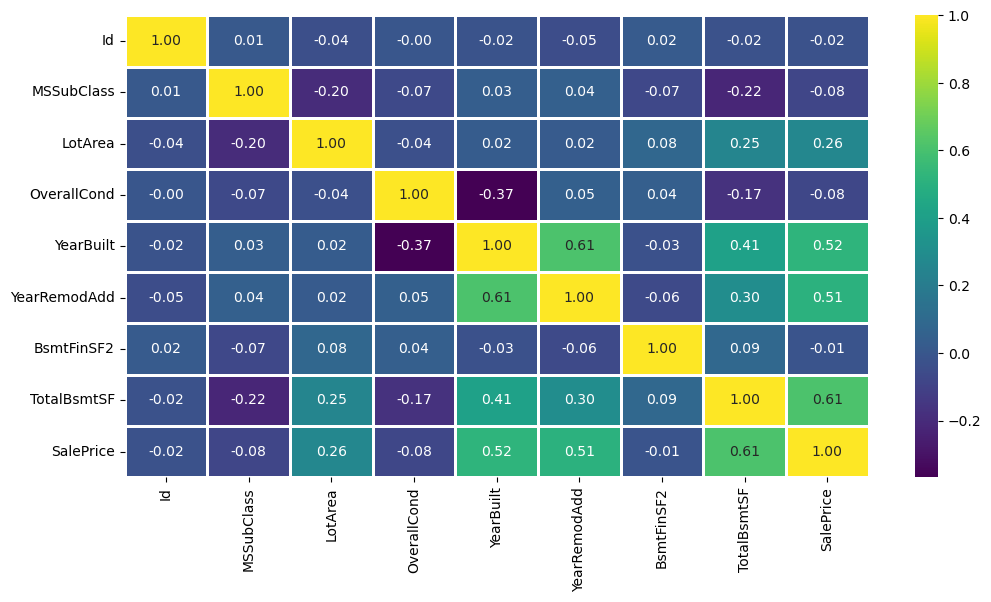

In [10]:
#heatmap to identify the relation between the numeric data
plt.figure(figsize=(12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap='viridis',fmt='.2f',
            linewidths=2,
            annot=True)

In [11]:
unique_values=[]
for col in object_cols:
    unique_values.append(dataset[col].unique().size)

<AxesSubplot:title={'center':'No. Unique values of categorical Features'}>

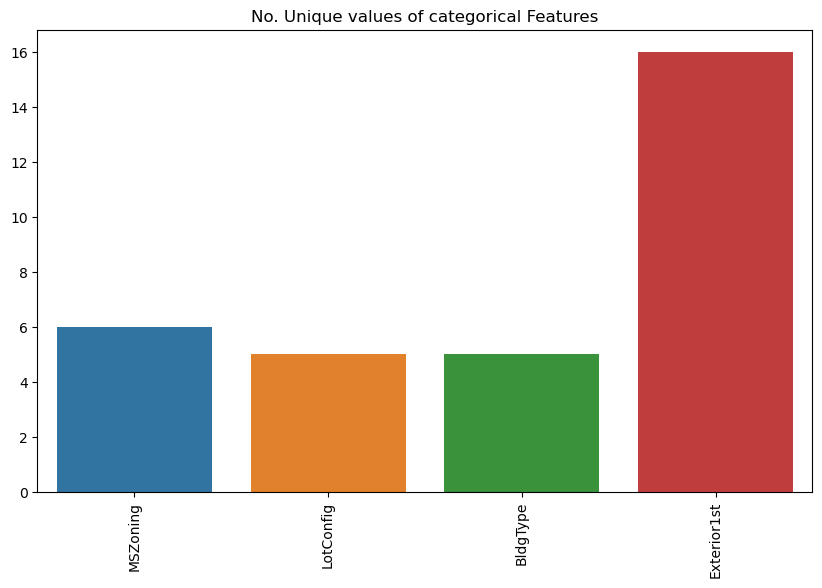

In [12]:
#Unique values of each object column
plt.figure(figsize=(10,6))
plt.title('No. Unique values of categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

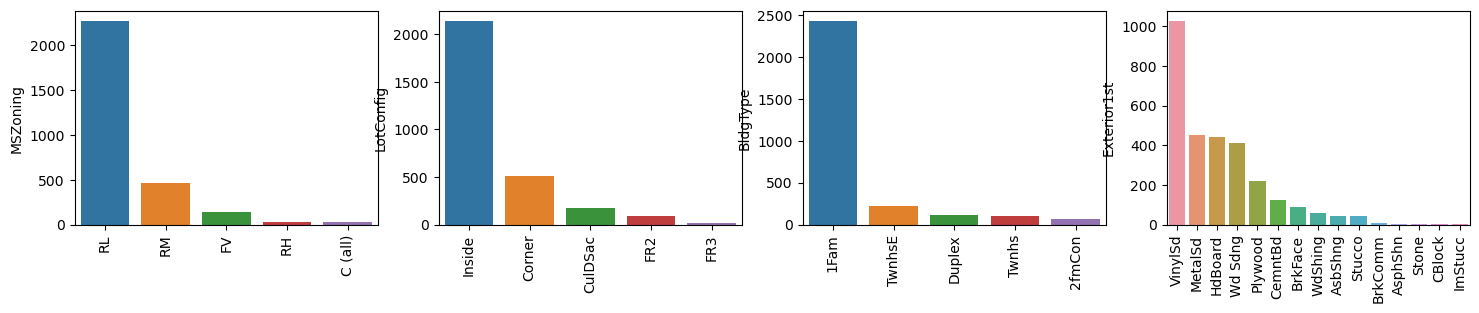

In [13]:
#distribution of each unique value 
plt.figure(figsize=(18,36))
plt.title("Categorical Feature distribution: Distribution")
plt.xticks(rotation=90)
index=1

for col in object_cols:
    y=dataset[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1

In [14]:
#dealing with null and missing values
dataset.drop(['Id'],axis=1,inplace=True)

In [15]:
dataset['SalePrice']=dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [16]:
new_dataset=dataset.dropna()

In [17]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [18]:
from sklearn.preprocessing import OneHotEncoder

s=(new_dataset.dtypes=='object')
object_cols=list(s[s].index)
print("Categorical Variables:")
print(object_cols)
print("No. of Categorical features:",
     len(object_cols))

Categorical Variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of Categorical features: 4


In [19]:
#converting the object data into numerical data
OH_encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
OH_cols=pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index=new_dataset.index
OH_cols.columns=OH_encoder.get_feature_names_out()
df_final=new_dataset.drop(object_cols,axis=1)
df_final=pd.concat([df_final,OH_cols],axis=1)

In [20]:
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [22]:
#training and testing dataset
x=df_final.drop(['SalePrice'],axis=1)
y=df_final['SalePrice']

In [23]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [27]:
#Trying to choose best algorithm
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR=svm.SVR()
model_SVR.fit(x_train,y_train)
y_pred=model_SVR.predict(x_valid)

mean_absolute_percentage_error(y_valid,y_pred)

0.1870512931870423

In [25]:
from sklearn.ensemble import RandomForestRegressor

model_RFR=RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train,y_train)
y_pred=model_RFR.predict(x_valid)

mean_absolute_percentage_error(y_valid,y_pred)

0.18833635207260518

In [26]:
from sklearn.linear_model import LinearRegression

model_LR=LinearRegression()
model_LR.fit(x_train,y_train)
y_pred=model_LR.predict(x_valid)

mean_absolute_percentage_error(y_valid,y_pred)

0.18741683841600162

In [28]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model=CatBoostRegressor()
cb_model.fit(x_train,y_train)
preds=cb_model.predict(x_valid) 

cb_r2_score=r2_score(y_valid, preds)
cb_r2_score

Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 162ms	remaining: 2m 42s
1:	learn: 55780.1567575	total: 168ms	remaining: 1m 23s
2:	learn: 55060.9599505	total: 172ms	remaining: 57.3s
3:	learn: 54456.1126921	total: 178ms	remaining: 44.3s
4:	learn: 53901.1464265	total: 183ms	remaining: 36.3s
5:	learn: 53334.6062357	total: 188ms	remaining: 31.1s
6:	learn: 52824.4943646	total: 193ms	remaining: 27.4s
7:	learn: 52381.4267520	total: 198ms	remaining: 24.6s
8:	learn: 51841.0364316	total: 204ms	remaining: 22.5s
9:	learn: 51281.5852560	total: 209ms	remaining: 20.7s
10:	learn: 50825.3817438	total: 214ms	remaining: 19.2s
11:	learn: 50477.2609796	total: 219ms	remaining: 18s
12:	learn: 50081.4097641	total: 223ms	remaining: 17s
13:	learn: 49663.6380360	total: 228ms	remaining: 16.1s
14:	learn: 49334.5782662	total: 232ms	remaining: 15.3s
15:	learn: 48967.5221026	total: 237ms	remaining: 14.6s
16:	learn: 48676.4063222	total: 242ms	remaining: 14s
17:	learn: 48359.1169955	total: 246ms	remaining: 

0.38351169878113034